In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
### LOADING THE DATASET


In [3]:
conn=sqlite3.connect("inventory.db") 
df=pd.read_sql_query("select* from vendor_sales_summery",conn)
df.head()

,VendorNumber,VendorName,Brand,Volume,ActualPrice,PurchasePrice,TotalPurchaseQuantity,TotalpurchaseDollars,Description,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRation
0,7245,PROXIMO SPIRITS INC.,3065,50.0,0.99,0.71,1,0.71,Three Olives Grape Vodka,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,200.0,1.99,1.47,1,1.47,The Club Strawbry Margarita,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,50.0,0.99,0.74,2,1.48,Deep Eddy Vodka,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,50.0,0.49,0.39,6,2.34,Dr McGillicuddy's Apple Pie,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,750.0,4.99,1.32,2,2.64,Concannon Glen Ellen Wh Zin,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalpurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


<function matplotlib.pyplot.show(close=None, block=None)>

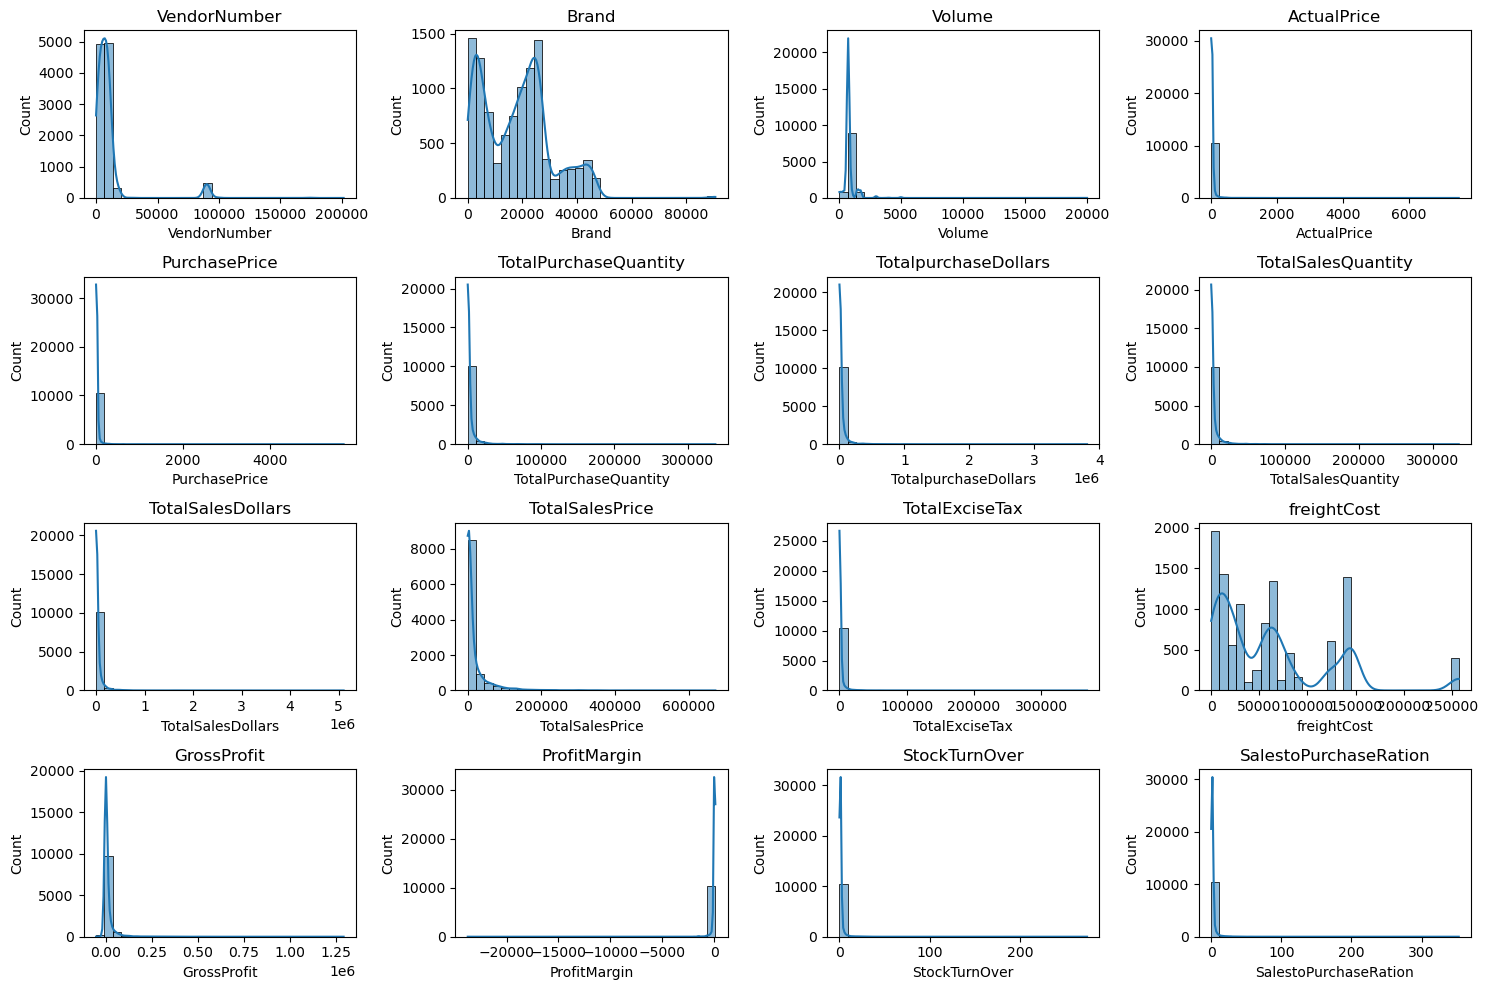

In [5]:
numerical_cols= df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

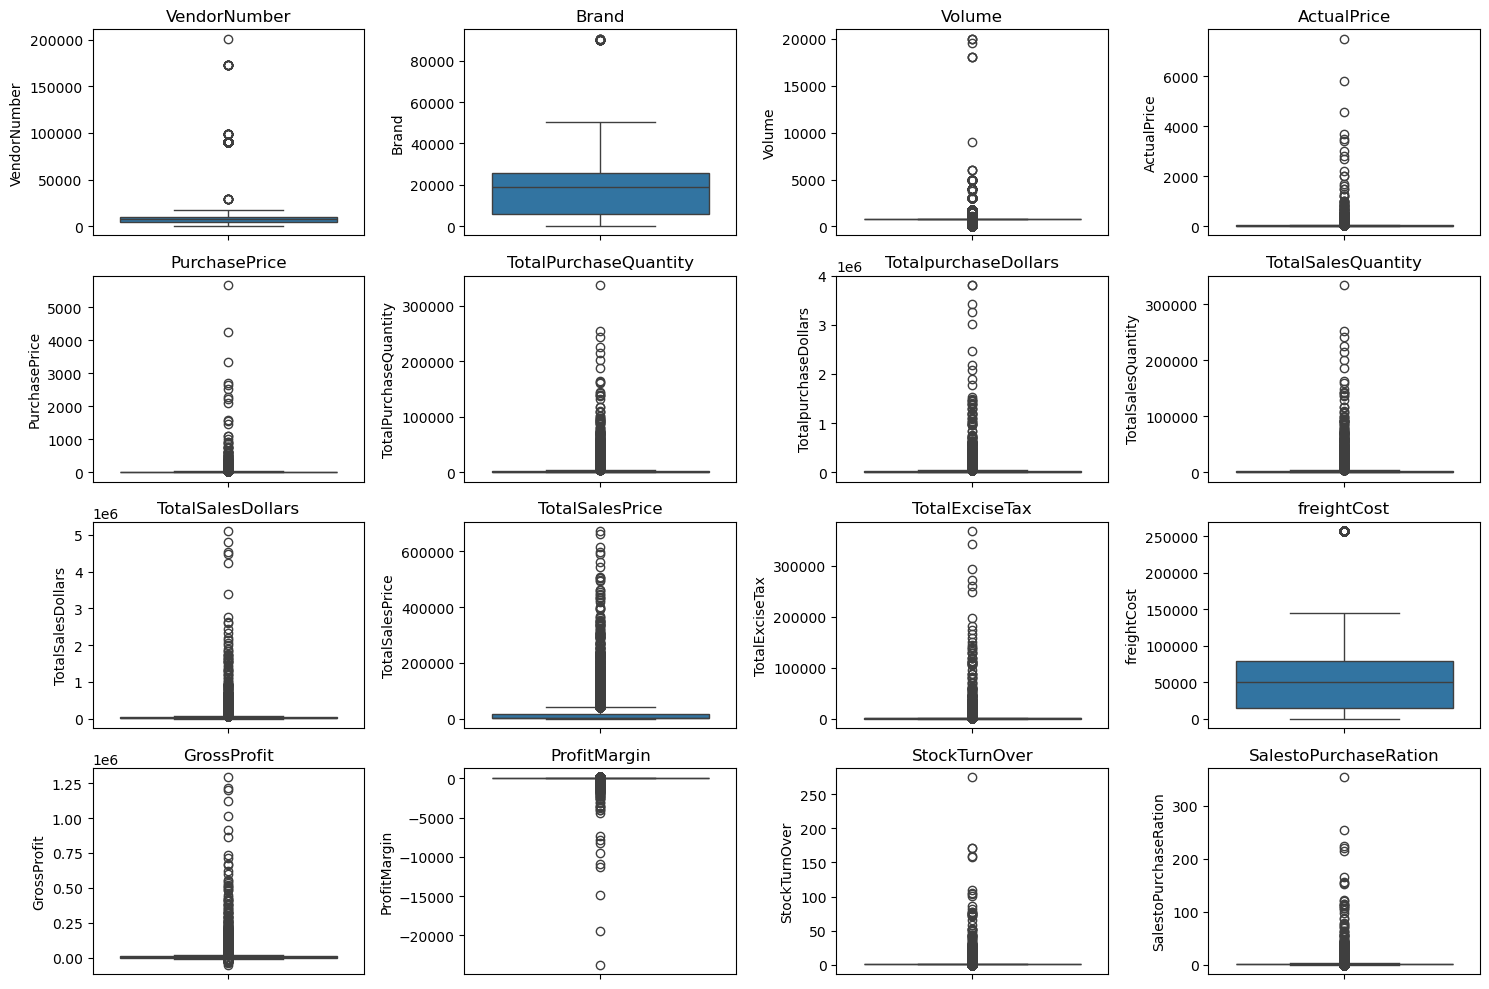

In [6]:
plt.figure(figsize= (15,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

In [7]:
df=pd.read_sql_query("""select * from vendor_sales_summery 
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""",conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Volume,ActualPrice,PurchasePrice,TotalPurchaseQuantity,TotalpurchaseDollars,Description,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRation
0,7245,PROXIMO SPIRITS INC.,3065,50.0,0.99,0.71,1,0.71,Three Olives Grape Vodka,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,200.0,1.99,1.47,1,1.47,The Club Strawbry Margarita,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,50.0,0.99,0.74,2,1.48,Deep Eddy Vodka,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,50.0,0.49,0.39,6,2.34,Dr McGillicuddy's Apple Pie,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,750.0,4.99,1.32,2,2.64,Concannon Glen Ellen Wh Zin,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,1750.0,29.99,21.89,138109,3023206.01,Ketel One Vodka,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
8560,3960,DIAGEO NORTH AMERICA INC,4261,1750.0,22.99,16.17,201682,3261197.94,Capt Morgan Spiced Rum,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
8561,17035,PERNOD RICARD USA,8068,1750.0,24.99,18.24,187407,3418303.68,Absolut 80 Proof,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
8562,4425,MARTIGNETTI COMPANIES,3405,1750.0,28.99,23.19,164038,3804041.22,Tito's Handmade Vodka,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


<function matplotlib.pyplot.show(close=None, block=None)>

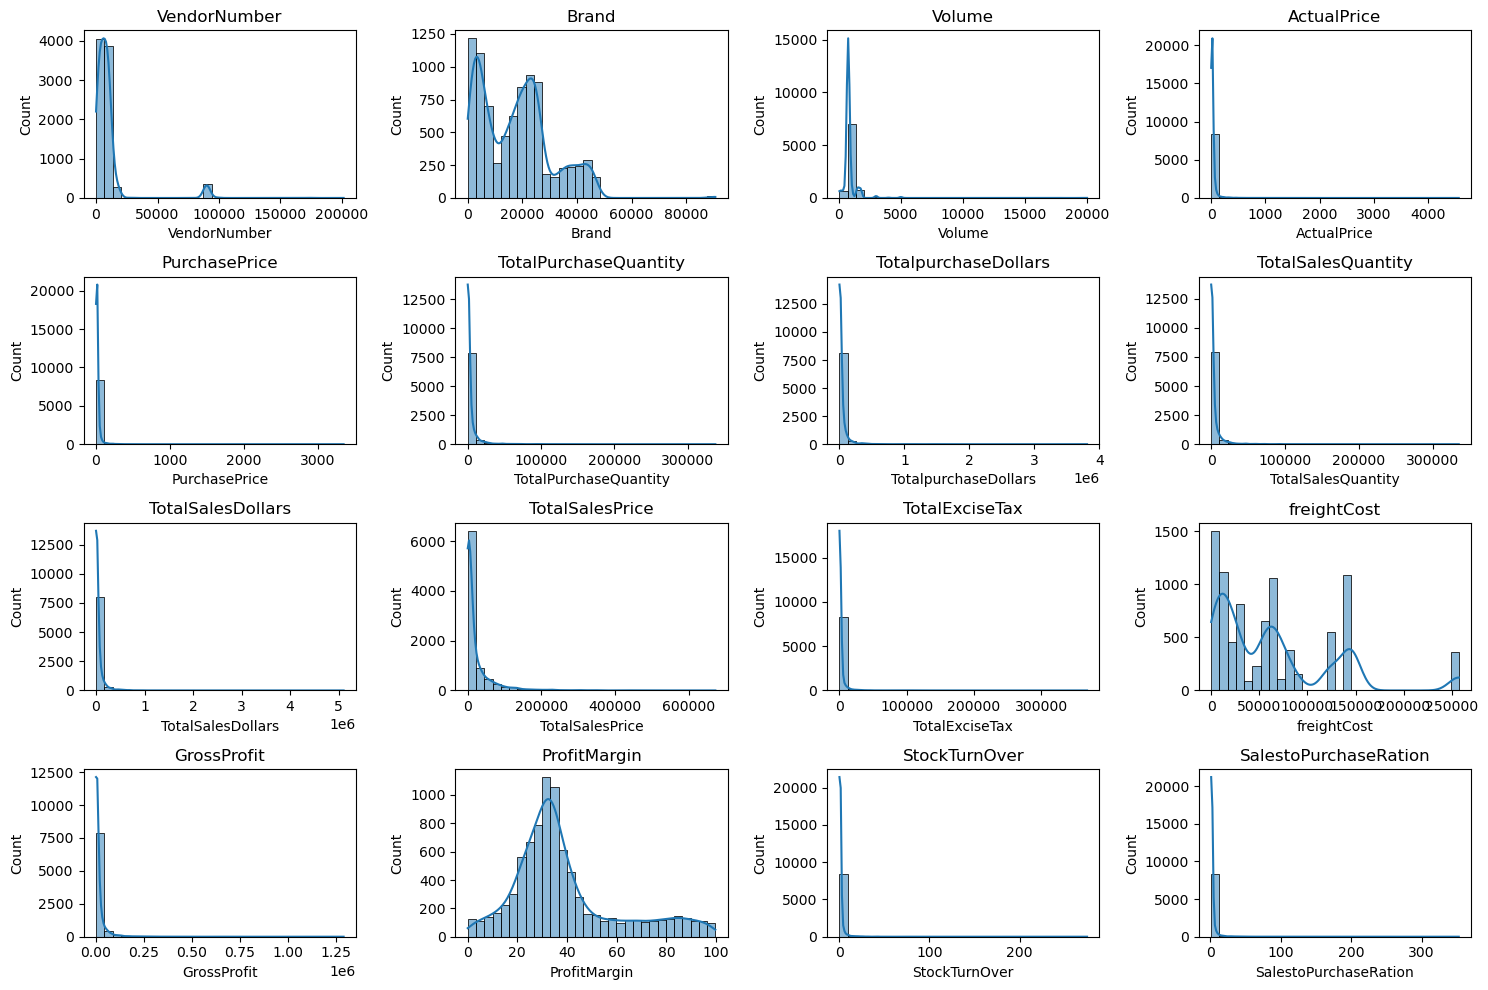

In [9]:
plt.figure(figsize= (15,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

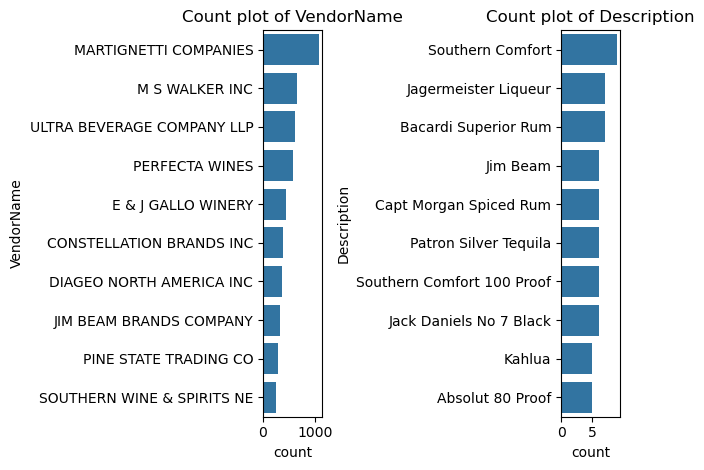

In [124]:
categorical_cols=['VendorName', 'Description']
for i, col in enumerate (categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

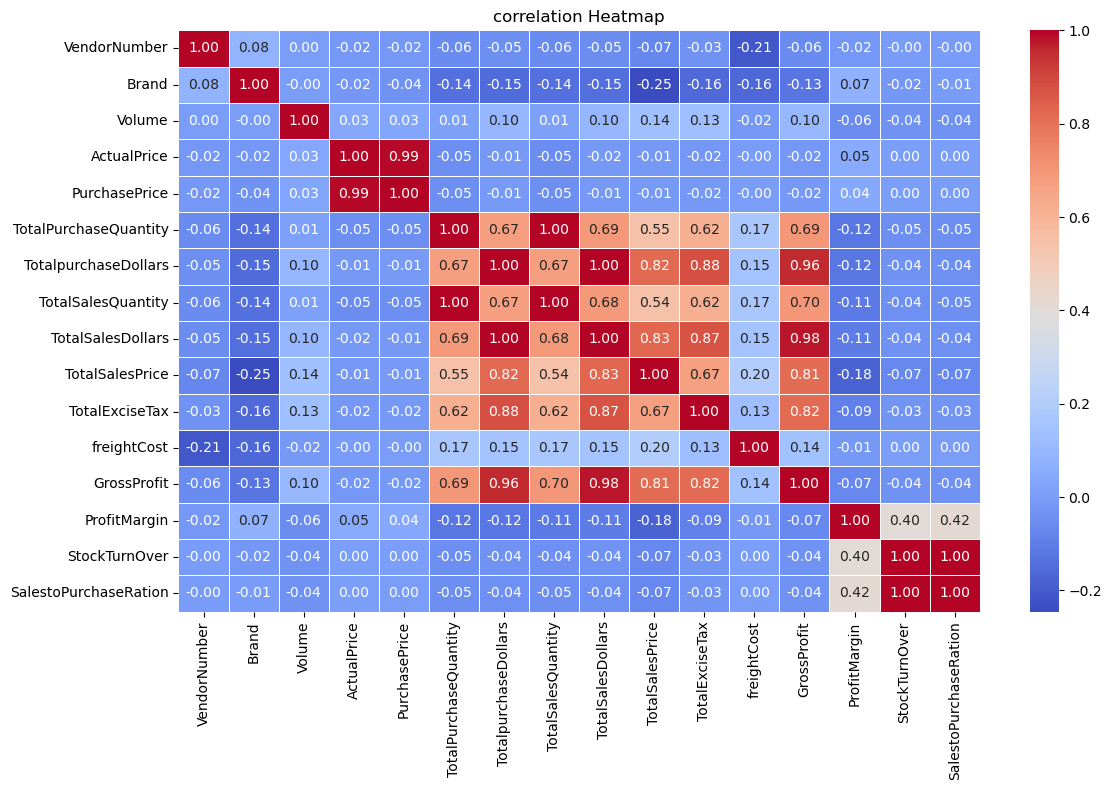

In [11]:
plt.figure(figsize= (12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation Heatmap")
plt.tight_layout()
plt.show

In [12]:
## DATA ANALYSIS TO SOLVE PROBLEMS

In [13]:
brand_performance= df.groupby("Description").agg({"TotalSalesDollars":"sum", "ProfitMargin":"mean"}).reset_index()

In [14]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [15]:
low_sales_thresold=brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_thesold=brand_performance["ProfitMargin"].quantile(0.85)

In [16]:
low_sales_thresold

np.float64(560.299)

In [17]:
high_margin_thesold

np.float64(64.97017552750113)

In [18]:
target_brands= brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_thresold) &
              (brand_performance["ProfitMargin"] >=high_margin_thesold)]
print("Brands with low sales and high profit margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales and high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [19]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<10000]

<function matplotlib.pyplot.show(close=None, block=None)>

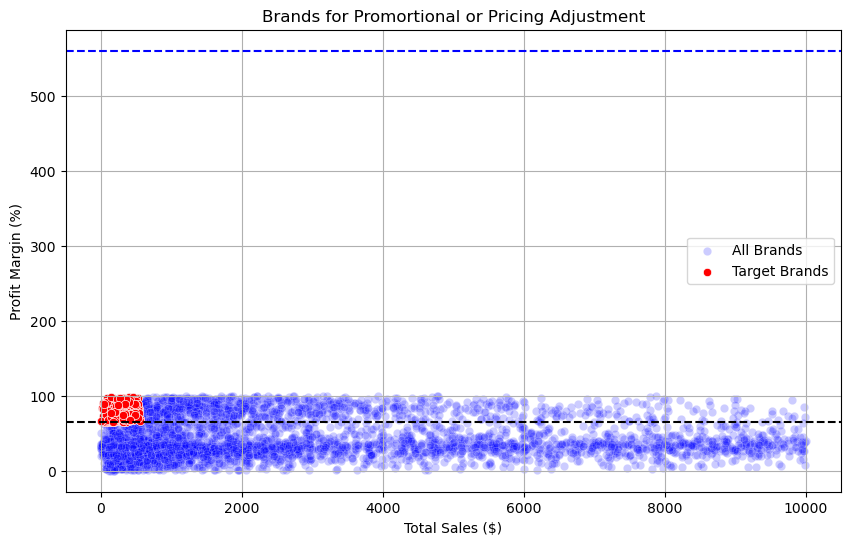

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x="TotalSalesDollars", y="ProfitMargin", color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x="TotalSalesDollars", y="ProfitMargin", color="red", label="Target Brands")

plt.axhline(high_margin_thesold, linestyle='--',color= "black", label="High Margin Thresold")
plt.axhline(low_sales_thresold, linestyle='--',color= "blue", label="Low sales Thresold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promortional or Pricing Adjustment")
plt.legend
plt.grid(True)
plt.show

In [21]:
## Identify top brand and vendors

In [22]:
def format_dollars(value):
    if value>= 1_000_000:
        return f'{value/1_000_000:.2f}M'
    elif value>= 1_000: 
        return f'{value/1_000:.2f}k'
    else:
        return str(value)

In [53]:
top_vendors=df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [54]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [55]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

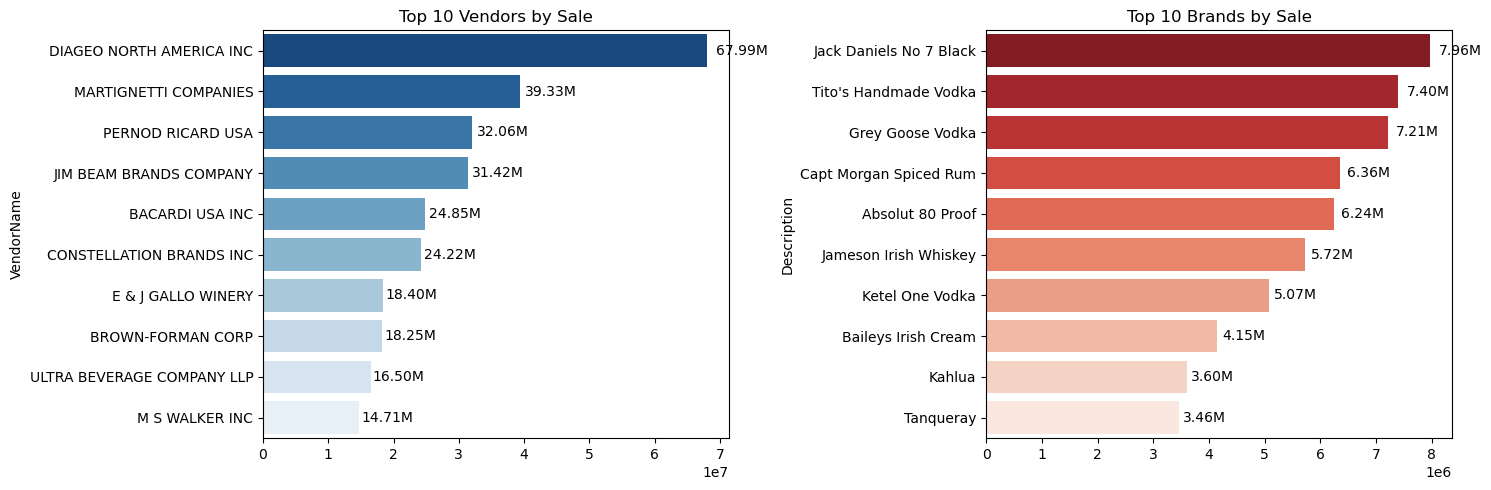

In [56]:
plt.figure(figsize=(15,5))

#top Vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r" )
plt.title("Top 10 Vendors by Sale")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
    bar.get_y()+ bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha="left", va="center", fontsize=10, color="Black")
#top_brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r" )
plt.title("Top 10 Brands by Sale")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
    bar.get_y()+ bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha="left", va="center", fontsize=10, color="Black")


plt.tight_layout()
plt.show()

In [27]:
## Which vendors contributed most to purchase dollers?

In [57]:
vendor_performance=df.groupby("VendorName").agg({
    "TotalpurchaseDollars":"sum", 
    "GrossProfit":"sum",
    "TotalSalesDollars": "sum"
}).reset_index()

In [83]:
vendor_performance['PurchaseContribution'] = vendor_performance["TotalpurchaseDollars"] / vendor_performance["TotalpurchaseDollars"].sum()*100

In [84]:
vendor_performance

,VendorName,TotalpurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [92]:
vendor_performance= round(vendor_performance.sort_values('PurchaseContribution',ascending=False),2)

In [93]:
vendor_performance

,VendorName,TotalpurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [75]:
#Display Top 10 Vendors

In [94]:
top_vendors=vendor_performance.head(10)
top_vendors['TotalpurchaseDollars']=top_vendors['TotalpurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalpurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [95]:
top_vendors['Cumulative_contribution']=top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalpurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


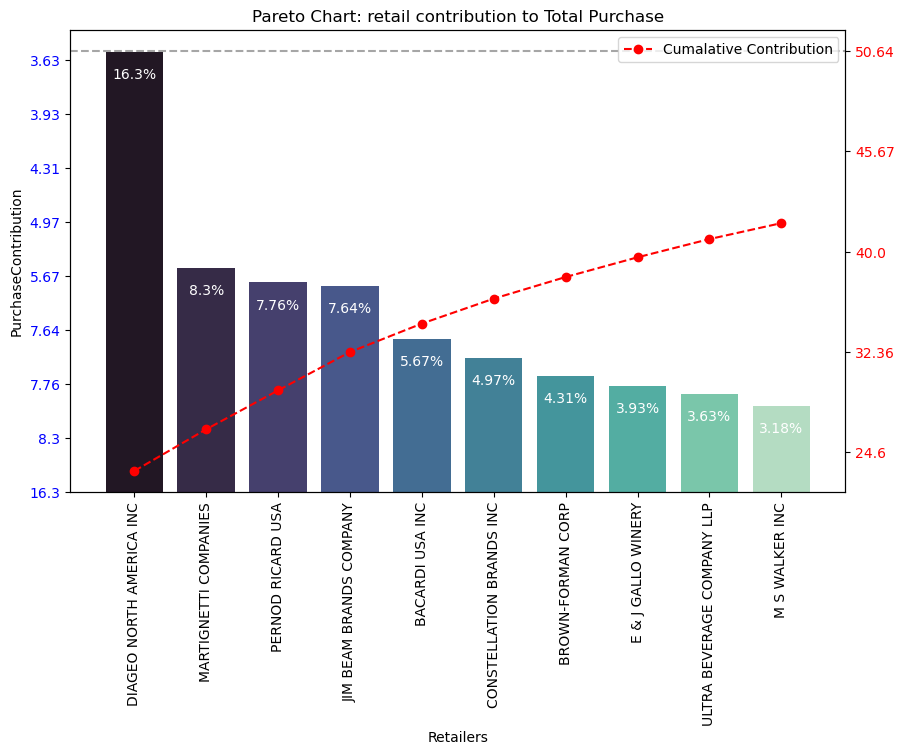

In [104]:
fig, ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution'], palette='mako', ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution']):
     ax1.text(i, value - 1, str(value)+ '%', ha='center', fontsize=10, color='white' )

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_contribution'], color='red', marker='o', linestyle='dashed', 
         label='Cumalative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_yticklabels(top_vendors['PurchaseContribution'], color='blue')
ax2.set_yticklabels(top_vendors['Cumulative_contribution'], color='red')
ax1.set_xlabel('Retailers')
ax1.set_title('Pareto Chart: retail contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [105]:
#top concritubution of vendors

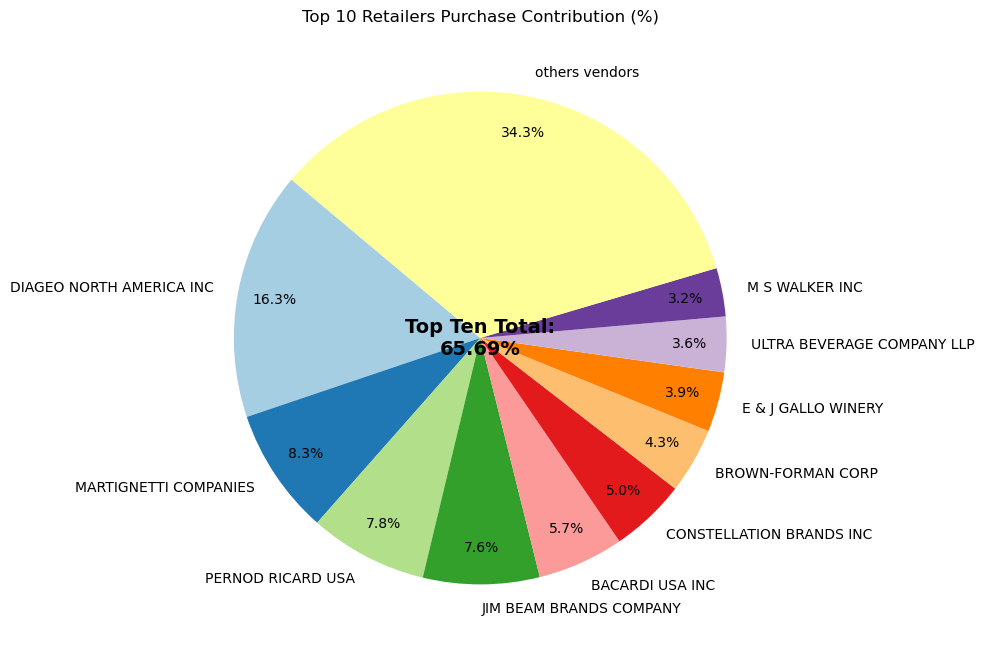

In [119]:
vendors = list(top_vendors['VendorName'].values) 
purchase_contribution = list(top_vendors['PurchaseContribution'].values) 
total_contribution = sum(purchase_contribution) 
remaim_contribution = 100- total_contribution

vendors.append('others vendors')
purchase_contribution.append(remaim_contribution)

#pie chart pesentation
figure, ax=plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie( purchase_contribution, labels= vendors ,autopct='%1.1f%%',
                                startangle=140, pctdistance= 0.85, colors= plt.cm.Paired.colors)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, f'Top Ten Total:\n{total_contribution:.2f}%', fontsize=14, fontweight='bold', ha='center', va='center')

plt.title('Top 10 Retailers Purchase Contribution (%)')
plt.show()